In [35]:
import pandas as pd
import os
from Constants.directory_paths import fcp_data_directories_with_demographics, fcp_root
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

### FCP Dataset

Cleaning the demographics information

In [36]:
concatenated_frame = []
column_names = ['subject', 'serial_no', 'age', 'sex', 'hospital', 'group', 'processed_data_path', 'type']

no_mprage_data_directory = ['NewHaven_b', 'Leipzig', 'Dallas', 'Pittsburgh', 'NewHaven_a']
currupted_data_directory = ['Orangeburg']
np_mprage_data_file = { 'Newark': 'sub46570' }

for directory in fcp_data_directories_with_demographics:
    if directory not in no_mprage_data_directory and directory not in currupted_data_directory:
        data = pd.read_table(fcp_root + directory + '/' + directory + '_demographics.txt', sep='\t', header=None, usecols=[0,1,2,3])
        df = pd.DataFrame(data)
        df.columns = ['subject', 'serial_no', 'sex', 'age'] if directory == 'NewYork_a' or directory == 'NewYork_a_ADHD' else ['subject', 'serial_no', 'age', 'sex']
        df['group'] = 'NA'
        df['type'] = 'fcp'
        df['processed_data_path'] = ['/shared/fcp/' + str(t) for t in df['subject']]
        df['hospital'] = directory
        entries = list(df['subject'])
        if len(entries) != len(set(entries)):
            raise('duplicate entries found!')
        df = df[(df.age > 17.99) & (df.age < 100.00)]
        if directory in np_mprage_data_file:
            df = df[df.subject != np_mprage_data_file[directory]]
        print(directory + ' ' + str(len(df)))
        df = df.reindex(columns=column_names)
        concatenated_frame.append(df)

df = pd.concat(concatenated_frame, ignore_index=True)

Oulu 103
AnnArbor_b 35
NewYork_a 59
Berlin_Margulies 26
Baltimore 23
Bangor 20
ICBM 86
Beijing_Zang 198
Leiden_2200 19
Munchen 16
Oxford 22
SaintLouis 31
Milwaukee_b 46
AnnArbor_a 13
Leiden_2180 12
Queensland 19
PaloAlto 17
Newark 18
NewYork_a_ADHD 25
Cambridge_Buckner 198
Atlanta 28
NewYork_b 20


/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: read_table is deprecated, use read_csv instead.


### IXI Dataset

We removed the duplicate entries from ixi demographics file manually, checked which files were missing and added the hospital names. Created a CSV file for the same and uploaded to this machine.

In [37]:
data = pd.read_csv('./ixi_demographics.csv')

In [38]:
df_ixi = pd.DataFrame(data)
df_ixi.columns = ['serial_no', 'sex', 'hospital', 'age', 'subject']
df_ixi['group'] = 'NA'
df_ixi['type'] = 'ixi'
df_ixi['processed_data_path'] = ['/shared/ixi/' + str(t) for t in df_ixi['subject']]
df_ixi = df_ixi.reindex(columns=column_names)
concatenated_frame.append(df_ixi)

In [39]:
df = pd.concat(concatenated_frame, ignore_index=True)

In [40]:
def plot_statistics(data_frame):
    print('There are {} patients'.format(len(data_frame)))
    print('There are {} hospitals'.format(len(data_frame.hospital.unique())))
    print('There are {:.2f}% of women'.format(100*np.mean(data_frame.sex == 'f')))
    print('Age statistics : ')
    print(data_frame.age.describe())

    # We plot the patient count over hospitals
    plt.figure(figsize=(30,20)) 
    plt.subplot(121)
    sns.countplot(y='hospital', data=data_frame)
    plt.title('Figure 1. Patient distribution per hospital')

    # We plot the age distribution over hospitals
    plt.subplot(122)
    sns.boxplot(x='age', y='hospital', data=data_frame)
    plt.title('Figure 2. Age distribution per hospital');

def plot_age_distribution(data_frame):
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    sns.distplot(data_frame["age"], bins=20, kde=False, label='Number of Subjects')
    plt.show()

There are 1597 patients
There are 25 hospitals
There are 52.66% of women
Age statistics : 
count    1597.000000
mean       35.599132
std        17.491271
min        18.000000
25%        22.000000
50%        27.000000
75%        48.052019
max        86.318960
Name: age, dtype: float64


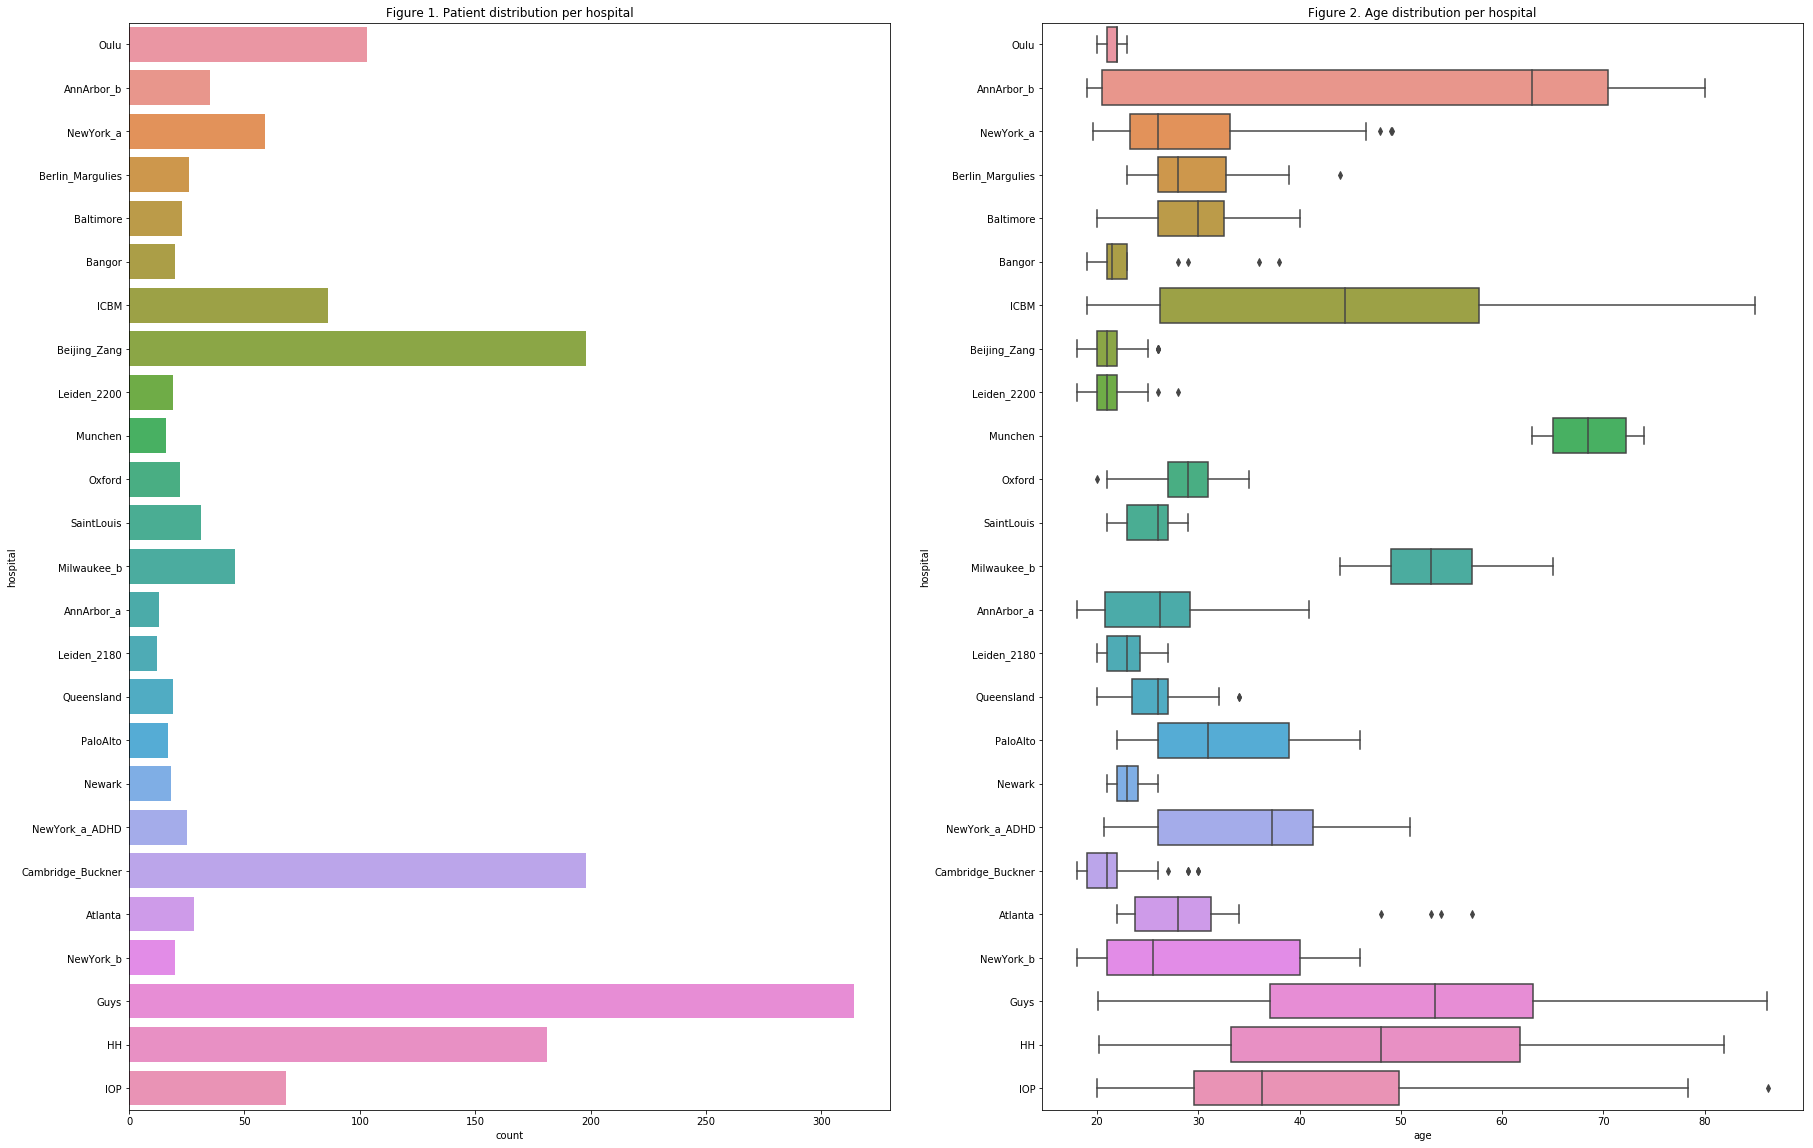

In [41]:
plot_statistics(df)

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


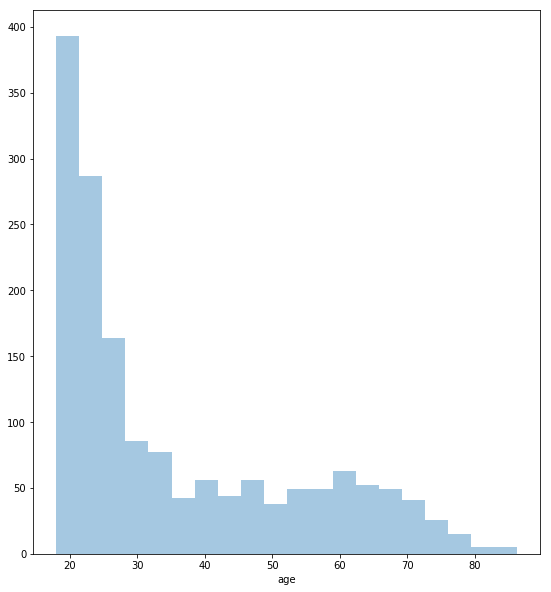

In [42]:
plot_age_distribution(df)

#### ADNI Dataset

Here we concatenate ADNI dataset to our existing data.

In [43]:
from Constants.directory_paths import adni_root
data = pd.read_csv('./ADNI1_Annual_2_Yr_1.5T_6_01_2019.csv')

In [44]:
df_adni = pd.DataFrame(data)
df_adni = df_adni[['Image Data ID', 'Age', 'Sex', 'Group']]
df_adni['hospital'] = 'NA'
df_adni['type'] = 'adni'
df_adni['Sex'] = [t.lower() for t in df_adni['Sex']]
df_adni['serial_no'] = [t+1 for t in range(len(df_adni))]
df_adni['processed_data_path'] = [adni_root + 'I' + str(t) for t in df_adni['Image Data ID']]
df_adni.columns = ['subject', 'age', 'sex', 'group', 'hospital', 'type', 'serial_no', 'processed_data_path']
df_adni = df_adni.reindex(columns=column_names)
concatenated_frame.append(df_adni)

In [45]:
df = pd.concat(concatenated_frame, ignore_index=True)

In [46]:
df

,subject,serial_no,age,sex,hospital,group,processed_data_path,type
0,sub01077,1,21.0,f,Oulu,NA,/shared/fcp/sub01077,fcp
1,sub01241,2,21.0,f,Oulu,NA,/shared/fcp/sub01241,fcp
2,sub01261,3,20.0,m,Oulu,NA,/shared/fcp/sub01261,fcp
3,sub01679,4,22.0,m,Oulu,NA,/shared/fcp/sub01679,fcp
4,sub02036,5,22.0,f,Oulu,NA,/shared/fcp/sub02036,fcp
5,sub05081,6,21.0,m,Oulu,NA,/shared/fcp/sub05081,fcp
6,sub06307,7,21.0,m,Oulu,NA,/shared/fcp/sub06307,fcp
7,sub07552,8,22.0,f,Oulu,NA,/shared/fcp/sub07552,fcp
8,sub07876,9,21.0,f,Oulu,NA,/shared/fcp/sub07876,fcp
9,sub07946,10,22.0,f,Oulu,NA,/shared/fcp/sub07946,fcp


There are 3321 patients
There are 26 hospitals
There are 47.18% of women
Age statistics : 
count    3321.000000
mean       56.673235
std        24.117174
min        18.000000
25%        28.000000
50%        67.241615
75%        77.000000
max        92.000000
Name: age, dtype: float64


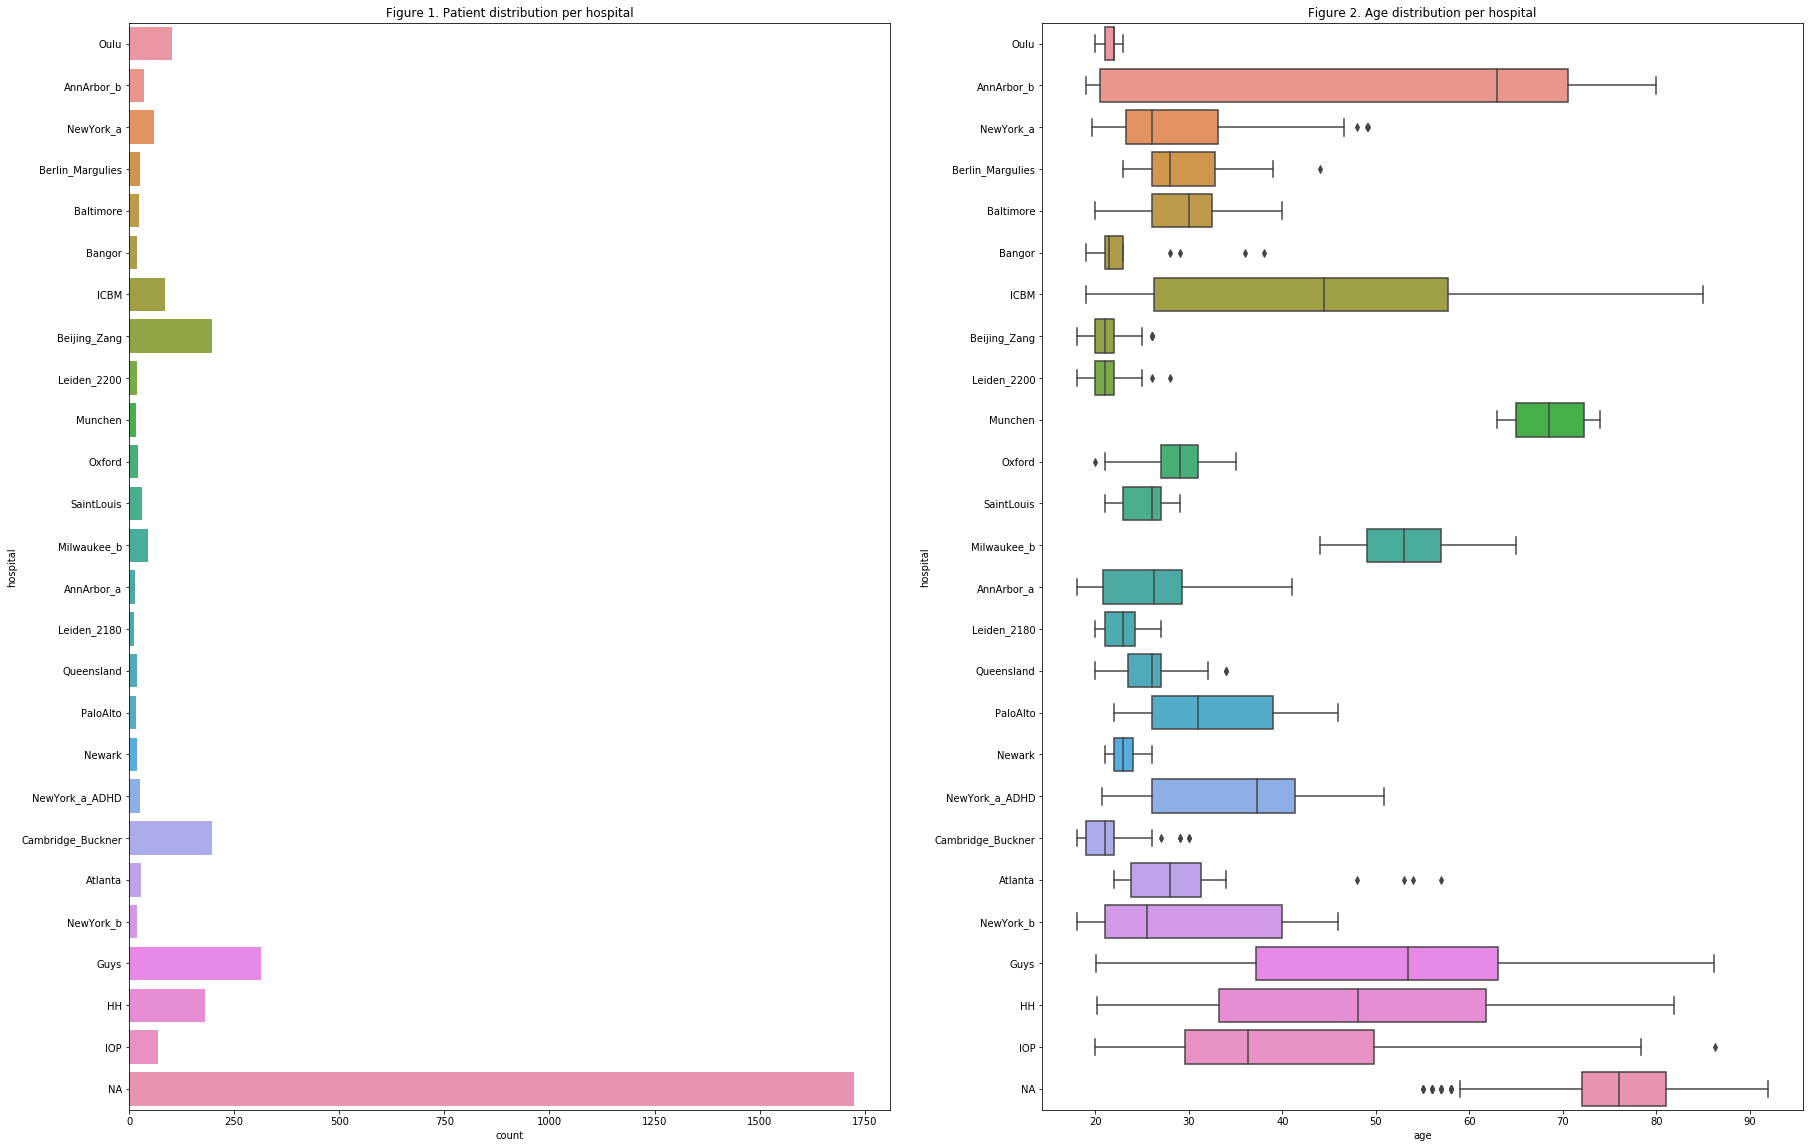

In [47]:
plot_statistics(df)

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


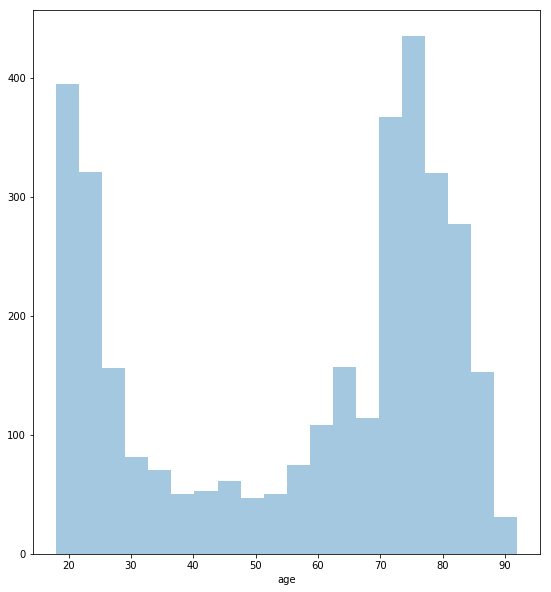

In [48]:
plot_age_distribution(df)

In [49]:
df.to_csv('./demographics.csv')